# Compare the analytical solution and the neural net mask

In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import sys
sys.path.append("..")
import os
from utils.model import Net_mask
from utils.data import Data
from scripts.parameters import get_parameters, get_parameters_1
import torch
import numpy as np
import matplotlib.pyplot as plt

In [21]:
tensor_mu_m, tensor_Sigma_m, tensor_mu_eps, tensor_Sigma_eps, tensor_Q_m, sigma2_eps, tau2 = get_parameters()
tensor_mu_m2, tensor_Sigma_m2, tensor_mu_eps2, tensor_Sigma_eps2, tensor_Q_m2, sigma2_eps2, tau22 = get_parameters_1()
data_generator = Data(tensor_mu_m, tensor_Sigma_m, tensor_mu_eps, tensor_Sigma_eps)
data_generator2 = Data(tensor_mu_m2, tensor_Sigma_m2, tensor_mu_eps2, tensor_Sigma_eps2)

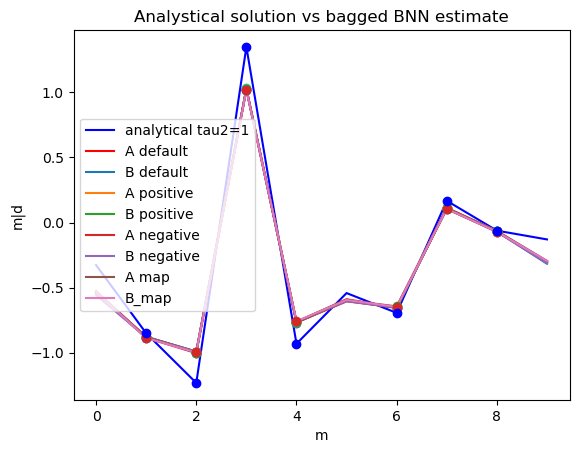

In [22]:
# Getting tensor
tensor_raw = data_generator.get_tensor_data(1)
input_tensor = tensor_raw[0]
d = input_tensor[:10]
mask = input_tensor[10:]
location_raw = torch.where(mask > 0.5)
location = location_raw[0]
post_mean, _ = data_generator.get_tensor_posterior(input_tensor)
post_mean2, _ = data_generator2.get_tensor_posterior(input_tensor)

# Plotting model estimates
outer_dir = 'noise_empirical'
rootdir = "../saved_models/" + str(outer_dir)
model = Net_mask()
names = []
sum_tensors = torch.zeros(8, 10)

directs = ['A_default', 'B_default', 'A_positive', 'B_positive', 'A_negative', 'B_negative', 'A_map', 'B_map']

for idx, d in enumerate(directs):
    rootdir = "../saved_models/" + str(d)
    for subdir, dirs, files in os.walk(rootdir):
        folders = dirs
        count = len(folders)
        break

    for f in folders: 
        name = '../saved_models/' + str(d) + '/' + str(f) + '/' + 'model_weights.pth'
        model.load_state_dict(torch.load(name))
        model.eval()
        out_raw = model(tensor_raw)
        out = out_raw[0].detach()
        sum_tensors[idx] = sum_tensors[idx] + out
        #plt.plot(range(10), post_mean)
        #plt.plot(range(10), out)
        #out = out + torch.randn(10)*0.01
        #plt.plot(range(10), out, '--', alpha=0.4)#, 'o')
        #plt.plot(location, out[location_raw], 'o')
        #names.append(str(f))
        #print(out)
plt.plot(range(10), post_mean2, 'b')
plt.plot(range(10), sum_tensors[0]/count, 'r')
plt.plot(range(10), sum_tensors[1]/count)
plt.plot(range(10), sum_tensors[2]/count)
plt.plot(range(10), sum_tensors[3]/count)
plt.plot(range(10), sum_tensors[4]/count)
plt.plot(range(10), sum_tensors[5]/count)
plt.plot(range(10), sum_tensors[6]/count)
plt.plot(range(10), sum_tensors[7]/count)
plt.plot(location, (sum_tensors[0]/count)[location_raw], 'ro')
plt.plot(location, (sum_tensors[1]/count)[location_raw], 'o')
plt.plot(location, (sum_tensors[2]/count)[location_raw], 'o')
plt.plot(location, (sum_tensors[3]/count)[location_raw], 'o')
plt.plot(location, (sum_tensors[4]/count)[location_raw], 'o')
plt.plot(location, (sum_tensors[5]/count)[location_raw], 'o')
plt.plot(location, (sum_tensors[6]/count)[location_raw], 'o')
plt.plot(location, (sum_tensors[7]/count)[location_raw], 'o')

plt.plot(location, post_mean2[location_raw], 'bo')

plt.title("Analystical solution vs bagged BNN estimate")
plt.xlabel("m")
plt.ylabel("m|d")
plt.legend(['analytical tau2=1', 'A default', 'B default', 'A positive', 'B positive', 'A negative', 'B negative', 'A map', 'B_map'])
#plt.legend(['analytical', 'A default', 'B default', 'A positive', 'B positive', 'A negative', 'B negative', 'A map', 'B_map'])
plt.savefig('../figures/3.pdf')